In [24]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import pandas as pd
from root_pandas import read_root

import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split



from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer

from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import seaborn as sns

from sklearn.neural_network import MLPClassifier

In [2]:
#################################################################################
#################################################################################

# Steps of ML
# 1. parameter optimization
# 2. ROC curve
# 3. correlation matrix(n dimensional features)
# 4. feature importance & feature selection

In [4]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [5]:
sig_nochunk = read_root('merged_1000_sig.root')
#uu = read_root('merged_1000_uu.root')
#dd = read_root('merged_1000_dd.root')
#ss = read_root('merged_1000_ss.root')
#cc = read_root('merged_1000_cc.root')
#charged = read_root('merged_1000_charged.root')
#mixed = read_root('merged_1000_mixed.root')
print(sig_nochunk.columns.values) 

['__experiment__' '__run__' '__event__' '__candidate__' '__ncandidates__'
 '__weight__' 'M' 'Mbc' 'E' 'p' 'useCMSFrame__bop__bc' 'deltaE'
 'roeE__bo__bc' 'roeM__bo__bc' 'roeP__bo__bc' 'roeMbc__bo__bc'
 'roeDeltae__bo__bc' 'roeEextra__bo__bc' 'roeNeextra__bo__bc' 'mcErrors'
 'mcPDG' 'isNotContinuumEvent' 'isSignal' 'isSignalAcceptMissingNeutrino'
 'SigProb' 'nTracks' 'nROE_Tracks__bo__bc' 'nROE_Charged__bo__bc'
 'nROE_RemainingTracks' 'nROE_ECLClusters__bo__bc' 'nROE_KLMClusters'
 'clusterE' 'clusterPhi' 'R2' 'thrustBm' 'thrustOm' 'cosTBTO' 'cosTBz'
 'KSFWVariables__bohso00__bc' 'KSFWVariables__bohso01__bc'
 'KSFWVariables__bohso02__bc' 'KSFWVariables__bohso03__bc'
 'KSFWVariables__bohso04__bc' 'KSFWVariables__bohso10__bc'
 'KSFWVariables__bohso12__bc' 'KSFWVariables__bohso14__bc'
 'KSFWVariables__bohso20__bc' 'KSFWVariables__bohso22__bc'
 'KSFWVariables__bohso24__bc' 'KSFWVariables__bohoo0__bc'
 'KSFWVariables__bohoo1__bc' 'KSFWVariables__bohoo2__bc'
 'KSFWVariables__bohoo3__bc' 'KSFWV

In [6]:
ML_columns_tag= [ 
   'Bsig_d0_R2', #'Bsig_d0_thrustBm', 
  'Bsig_d0_missingMomentumOfEvent', 
    'Bsig_d0_missingEnergyOfEventCMS', 
    'missingMomentumOfEvent',
    'missingMass2OfEvent', 'roeEextra__bo__bc', 'roeEextra__bocleanMask__bc','Bsig_d0_roeNeextra_cleanMask', 
    'Bsig_d0_nROE_Tracks_cleanMask',
 'Bsig_d0_nROE_Charged_cleanMask', 'Bsig_d0_nROE_ECLClusters_cleanMask',
    'Bsig_d0_roeE', 'Bsig_d0_roeM', 'Bsig_d0_roeP', 'Bsig_d0_roeMbc',  'Bsig_d0_nTracks', 'Bsig_d0_nROE_Tracks' ,'Bsig_d0_nROE_Charged',
 'Bsig_d0_nROE_RemainingTracks', 'Bsig_d0_nROE_ECLClusters',
 'Bsig_d0_nROE_KLMClusters', 'Bsig_d0_roeE_cleanMask', 'Bsig_d0_roeM_cleanMask'
    
]
# CS variables are only NaN for tag.

In [7]:
sig_chunk = read_root(
    ['merged_1000_sig.root'], columns=ML_columns_tag, chunksize=100000
)
uu_chunk = read_root(
    ['merged_1000_uu.root'], columns=ML_columns_tag, chunksize=100000
)
dd_chunk = read_root(
    ['merged_1000_dd.root'], columns=ML_columns_tag, chunksize=100000
)
ss_chunk = read_root(
    ['merged_1000_ss.root'], columns=ML_columns_tag, chunksize=100000
)
cc_chunk = read_root(
    ['merged_1000_cc.root'], columns=ML_columns_tag, chunksize=100000
)
charged_chunk = read_root(
    ['merged_1000_charged.root'], columns=ML_columns_tag, chunksize=100000
)
mixed_chunk = read_root(
    ['merged_1000_mixed.root'], columns=ML_columns_tag, chunksize=100000
)

In [8]:
sig_list = []
for chunk in sig_chunk: 
    sig_list.append(chunk)
sig = pd.concat(sig_list)  


uu_list = []
for chunk in uu_chunk: 
    uu_list.append(chunk)
uu = pd.concat(uu_list)  

dd_list = []
for chunk in dd_chunk: 
    dd_list.append(chunk)
dd = pd.concat(dd_list)  


ss_list = []
for chunk in ss_chunk: 
    ss_list.append(chunk)
ss = pd.concat(ss_list)  


cc_list = []
for chunk in cc_chunk: 
    cc_list.append(chunk)
cc = pd.concat(cc_list)  


charged_list = []
for chunk in charged_chunk: 
    charged_list.append(chunk)
charged = pd.concat(charged_list)  


mixed_list = []
for chunk in mixed_chunk: 
    mixed_list.append(chunk)
mixed = pd.concat(mixed_list)  

In [9]:
sig

,Bsig_d0_R2,Bsig_d0_missingMomentumOfEvent,Bsig_d0_missingEnergyOfEventCMS,missingMomentumOfEvent,missingMass2OfEvent,roeEextra__bo__bc,roeEextra__bocleanMask__bc,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_nROE_Charged_cleanMask,...,Bsig_d0_roeP,Bsig_d0_roeMbc,Bsig_d0_nTracks,Bsig_d0_nROE_Tracks,Bsig_d0_nROE_Charged,Bsig_d0_nROE_RemainingTracks,Bsig_d0_nROE_ECLClusters,Bsig_d0_nROE_KLMClusters,Bsig_d0_roeE_cleanMask,Bsig_d0_roeM_cleanMask
0,0.196495,1.461586,2.910474,1.461586,5.493785,1.615309,1.020862,2.182517,5.0,5.0,...,1.600941,5.235862,8.0,7.0,7.0,0.0,33.0,1.0,5.895381,5.645956
1,0.196495,1.461586,2.910474,1.461586,5.493785,1.463856,0.869409,2.182517,5.0,5.0,...,1.600941,5.235862,8.0,7.0,7.0,0.0,33.0,1.0,5.895381,5.645956
2,0.196495,1.461586,2.910474,1.461586,5.493785,1.514494,0.920047,2.182517,5.0,5.0,...,1.600941,5.235862,8.0,7.0,7.0,0.0,33.0,1.0,5.895381,5.645956
3,0.563207,2.627598,3.413040,2.627598,7.526239,0.719410,0.433941,0.887408,4.0,4.0,...,1.181564,5.222726,7.0,6.0,6.0,0.0,17.0,3.0,5.391528,5.083504
4,0.563207,2.627598,3.413040,2.627598,7.526239,1.172876,0.887408,0.887408,4.0,4.0,...,1.181564,5.222726,7.0,6.0,6.0,0.0,17.0,3.0,5.391528,5.083504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,0.276495,2.168301,3.761348,2.168301,11.462583,0.294298,0.140487,1.493227,7.0,7.0,...,1.359456,5.278637,8.0,7.0,7.0,0.0,16.0,2.0,5.383156,5.193963
49692,0.276495,2.168301,3.761348,2.168301,11.462583,0.471716,0.317905,1.493227,7.0,7.0,...,1.359456,5.278637,8.0,7.0,7.0,0.0,16.0,2.0,5.383156,5.193963
49693,0.093931,2.971333,3.146217,2.971333,3.107875,0.759626,0.696714,0.826184,6.0,6.0,...,1.443313,5.147677,8.0,7.0,7.0,0.0,17.0,2.0,5.459092,5.306922
49694,0.093931,2.971333,3.146217,2.971333,3.107875,0.759626,0.696714,0.826184,6.0,6.0,...,1.443313,5.147677,8.0,7.0,7.0,0.0,17.0,2.0,5.459092,5.306922


In [10]:
frames = [uu, dd, ss, cc, charged, mixed]
bkg = pd.concat(frames, keys=['uu', 'dd', 'ss', 'cc', 'charged', 'mixed'])

In [11]:
bkg

Bsig_d0_R2  Bsig_d0_missingMomentumOfEvent  \
uu    0         0.388749                        1.012900   
      1         0.347812                        0.105669   
      2         0.347812                        0.105669   
      3         0.347812                        0.105669   
      4         0.347812                        0.105669   
...                  ...                             ...   
mixed 930526    0.032221                        1.087867   
      930527    0.110761                        0.677393   
      930528    0.212316                        0.528573   
      930529    0.212316                        0.528573   
      930530    0.212316                        0.528573   

              Bsig_d0_missingEnergyOfEventCMS  missingMomentumOfEvent  \
uu    0                              0.375174                1.012900   
      1                             -0.117634                0.105669   
      2                             -0.117634                0.105669   
      3                             -0.117634                0.105669   
      4                             -0.117634                0.105669   
...                                       ...                     ...   
mixed 930526                        -0.371779                1.087867   
      930527                         0.843130                0.677393   
      930528                         0.352843                0.528573   
      930529                         0.352843                0.528573   
      930530                         0.352843                0.528573   

              missingMass2OfEvent  roeEextra__bo__bc  \
uu    0                 -0.673675           2.405871   
      1                 -0.000126           2.606894   
      2                 -0.000126           2.606894   
      3                 -0.000126           2.802900   
      4                 -0.000126           2.867405   
...                           ...                ...   
mixed 930526            -0.797302           4.567032   
      930527             0.399554           5.049945   
      930528            -0.202600           3.090240   
      930529            -0.202600           3.045901   
      930530            -0.202600           3.242040   

              roeEextra__bocleanMask__bc  Bsig_d0_roeNeextra_cleanMask  \
uu    0                         2.332463                      3.330882   
      1                         2.212888                      3.549072   
      2                         2.212888                      3.549072   
      3                         2.408894                      3.549072   
      4                         2.473399                      3.549072   
...                                  ...                           ...   
mixed 930526                    4.115555                      3.978063   
      930527                    4.728507                      6.409268   
      930528                    2.764923                      3.550675   
      930529                    2.838249                      3.550675   
      930530                    2.916723                      3.550675   

              Bsig_d0_nROE_Tracks_cleanMask  Bsig_d0_nROE_Charged_cleanMask  \
uu    0                                 6.0                             6.0   
      1                                 8.0                             8.0   
      2                                 8.0                             8.0   
      3                                 8.0                             8.0   
      4                                 8.0                             8.0   
...                                     ...                             ...   
mixed 930526                            7.0                             7.0   
      930527                            5.0                             5.0   
      930528                            9.0                             9.0   
      930529                            9.0                     

In [12]:
## Use only fraction of data frame 
# https://stackoverflow.com/questions/54730276/how-to-randomly-split-a-dataframe-into-several-smaller-dataframes

shuffled = sig.sample(frac=1)   # shuffle the rows of dataframe 
sig_frac = np.array_split(shuffled, 100)  # split it into n dataframes
sig_frac[0]  # choose first array with 0

,Bsig_d0_R2,Bsig_d0_missingMomentumOfEvent,Bsig_d0_missingEnergyOfEventCMS,missingMomentumOfEvent,missingMass2OfEvent,roeEextra__bo__bc,roeEextra__bocleanMask__bc,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_nROE_Charged_cleanMask,...,Bsig_d0_roeP,Bsig_d0_roeMbc,Bsig_d0_nTracks,Bsig_d0_nROE_Tracks,Bsig_d0_nROE_Charged,Bsig_d0_nROE_RemainingTracks,Bsig_d0_nROE_ECLClusters,Bsig_d0_nROE_KLMClusters,Bsig_d0_roeE_cleanMask,Bsig_d0_roeM_cleanMask
32404,0.138544,1.997349,2.714978,1.997349,1.841337,1.362929,1.133187,2.611722,3.0,3.0,...,1.796830,5.275113,4.0,3.0,3.0,0.0,24.0,2.0,6.213935,5.918272
3222,0.084874,1.801515,3.862484,1.801515,11.919627,1.219079,0.902728,1.066465,7.0,7.0,...,2.156576,5.267233,11.0,10.0,10.0,0.0,26.0,1.0,4.971941,4.878198
37286,0.243073,1.462250,3.106644,1.462250,7.087885,1.285774,1.061073,2.219172,5.0,5.0,...,2.373596,5.244193,6.0,5.0,5.0,0.0,21.0,2.0,6.307919,5.826255
23693,0.173432,1.400820,4.561968,1.400820,20.200495,0.590687,0.336964,1.989080,6.0,6.0,...,1.968542,5.246355,8.0,7.0,7.0,0.0,19.0,3.0,6.298263,5.966601
6974,0.218573,3.492470,4.761258,3.492470,8.271913,1.204969,0.899113,1.401779,6.0,6.0,...,2.205243,5.282006,12.0,11.0,11.0,0.0,24.0,3.0,6.186558,5.704763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,0.215851,3.003199,6.197206,3.003199,36.306400,1.109729,0.952873,1.248361,3.0,3.0,...,2.312463,5.214728,7.0,6.0,6.0,0.0,16.0,0.0,3.673751,3.612924
35877,0.467629,2.143393,3.199455,2.143393,5.664250,1.375338,1.064209,1.375644,4.0,4.0,...,2.898106,5.125942,7.0,6.0,6.0,0.0,24.0,1.0,5.174269,4.971116
46264,0.097740,2.272455,2.623301,2.272455,3.134676,1.157410,0.952018,1.176836,7.0,7.0,...,1.608575,5.279190,8.0,7.0,7.0,0.0,21.0,4.0,6.302126,6.057647
26722,0.251463,2.298911,2.923839,2.298911,3.695741,2.007663,1.672854,2.611647,4.0,4.0,...,1.954664,5.275086,6.0,5.0,5.0,0.0,25.0,1.0,5.790854,5.380191


In [13]:
## Use only fraction of data frame 
# https://stackoverflow.com/questions/54730276/how-to-randomly-split-a-dataframe-into-several-smaller-dataframes

shuffled = bkg.sample(frac=1) # shuffle the rows of dataframe 
bkg_frac = np.array_split(shuffled, 100)  # split it into n dataframes
bkg_frac[0] # choose first array with 0

Bsig_d0_R2  Bsig_d0_missingMomentumOfEvent  \
cc      488497     0.229112                        1.689746   
charged 396319     0.237685                        0.588958   
cc      326442     0.486749                        0.187528   
        1407945    0.217505                        1.315475   
uu      239585     0.414802                        0.601557   
...                     ...                             ...   
        518369     0.059726                        0.479946   
charged 686862     0.137729                        0.610161   
ss      73206      0.268363                        0.859827   
cc      1739505    0.188300                        0.414471   
mixed   342672     0.185112                        0.549184   

                 Bsig_d0_missingEnergyOfEventCMS  missingMomentumOfEvent  \
cc      488497                          1.754382                1.689746   
charged 396319                          0.705827                0.588958   
cc      326442                          0.515574                0.187528   
        1407945                         3.144589                1.315475   
uu      239585                         -0.748691                0.601557   
...                                          ...                     ...   
        518369                          2.022022                0.479946   
charged 686862                          1.902814                0.610161   
ss      73206                           1.152135                0.859827   
cc      1739505                         0.713762                0.414471   
mixed   342672                          0.175669                0.549184   

                 missingMass2OfEvent  roeEextra__bo__bc  \
cc      488497              1.008657           2.777431   
charged 396319              0.137237           2.890962   
cc      326442              0.203790           3.409841   
        1407945             5.532013           1.931259   
uu      239585              0.093598           4.373643   
...                              ...                ...   
        518369              3.251849           2.391899   
charged 686862              3.569428           1.659851   
ss      73206               0.763712           3.598407   
cc      1739505             0.188958           3.501178   
mixed   342672             -0.300315           3.360598   

                 roeEextra__bocleanMask__bc  Bsig_d0_roeNeextra_cleanMask  \
cc      488497                     2.620010                      3.402167   
charged 396319                     2.662763                      1.785615   
cc      326442                     3.246835                      3.459275   
        1407945                    1.564270                      2.115546   
uu      239585                     3.816252                      3.075577   
...                                     ...                           ...   
        518369                     2.114644                      2.577127   
charged 686862                     1.384089                      2.146219   
ss      73206                      3.197155                      3.318702   
cc      1739505                    3.197819                      3.775634   
mixed   342672                     3.141428                      2.709170   

                 Bsig_d0_nROE_Tracks_cleanMask  \
cc      488497                             9.0   
charged 396319                            11.0   
cc      326442                             7.0   
        1407945                            8.0   
uu      239585                             7.0   
...                                        ...   
        518369                             8.0   
charged 686862                            10.0   
ss      73206                              7.0   
cc      1739505                            8.0   
mixed   342672                             7.0   

                 Bsig_d0_nROE_Charged_cleanMask  ...  Bsig_d0_roeP  \
cc      488497                            

In [14]:
sig_drop = sig_frac[0].dropna() 
bkg_drop = bkg_frac[0].dropna()
bkg_drop

Bsig_d0_R2  Bsig_d0_missingMomentumOfEvent  \
cc      488497     0.229112                        1.689746   
charged 396319     0.237685                        0.588958   
cc      326442     0.486749                        0.187528   
        1407945    0.217505                        1.315475   
uu      239585     0.414802                        0.601557   
...                     ...                             ...   
        518369     0.059726                        0.479946   
charged 686862     0.137729                        0.610161   
ss      73206      0.268363                        0.859827   
cc      1739505    0.188300                        0.414471   
mixed   342672     0.185112                        0.549184   

                 Bsig_d0_missingEnergyOfEventCMS  missingMomentumOfEvent  \
cc      488497                          1.754382                1.689746   
charged 396319                          0.705827                0.588958   
cc      326442                          0.515574                0.187528   
        1407945                         3.144589                1.315475   
uu      239585                         -0.748691                0.601557   
...                                          ...                     ...   
        518369                          2.022022                0.479946   
charged 686862                          1.902814                0.610161   
ss      73206                           1.152135                0.859827   
cc      1739505                         0.713762                0.414471   
mixed   342672                          0.175669                0.549184   

                 missingMass2OfEvent  roeEextra__bo__bc  \
cc      488497              1.008657           2.777431   
charged 396319              0.137237           2.890962   
cc      326442              0.203790           3.409841   
        1407945             5.532013           1.931259   
uu      239585              0.093598           4.373643   
...                              ...                ...   
        518369              3.251849           2.391899   
charged 686862              3.569428           1.659851   
ss      73206               0.763712           3.598407   
cc      1739505             0.188958           3.501178   
mixed   342672             -0.300315           3.360598   

                 roeEextra__bocleanMask__bc  Bsig_d0_roeNeextra_cleanMask  \
cc      488497                     2.620010                      3.402167   
charged 396319                     2.662763                      1.785615   
cc      326442                     3.246835                      3.459275   
        1407945                    1.564270                      2.115546   
uu      239585                     3.816252                      3.075577   
...                                     ...                           ...   
        518369                     2.114644                      2.577127   
charged 686862                     1.384089                      2.146219   
ss      73206                      3.197155                      3.318702   
cc      1739505                    3.197819                      3.775634   
mixed   342672                     3.141428                      2.709170   

                 Bsig_d0_nROE_Tracks_cleanMask  \
cc      488497                             9.0   
charged 396319                            11.0   
cc      326442                             7.0   
        1407945                            8.0   
uu      239585                             7.0   
...                                        ...   
        518369                             8.0   
charged 686862                            10.0   
ss      73206                              7.0   
cc      1739505                            8.0   
mixed   342672                             7.0   

                 Bsig_d0_nROE_Charged_cleanMask  ...  Bsig_d0_roeP  \
cc      488497                            

In [15]:
sig_drop

,Bsig_d0_R2,Bsig_d0_missingMomentumOfEvent,Bsig_d0_missingEnergyOfEventCMS,missingMomentumOfEvent,missingMass2OfEvent,roeEextra__bo__bc,roeEextra__bocleanMask__bc,Bsig_d0_roeNeextra_cleanMask,Bsig_d0_nROE_Tracks_cleanMask,Bsig_d0_nROE_Charged_cleanMask,...,Bsig_d0_roeP,Bsig_d0_roeMbc,Bsig_d0_nTracks,Bsig_d0_nROE_Tracks,Bsig_d0_nROE_Charged,Bsig_d0_nROE_RemainingTracks,Bsig_d0_nROE_ECLClusters,Bsig_d0_nROE_KLMClusters,Bsig_d0_roeE_cleanMask,Bsig_d0_roeM_cleanMask
32404,0.138544,1.997349,2.714978,1.997349,1.841337,1.362929,1.133187,2.611722,3.0,3.0,...,1.796830,5.275113,4.0,3.0,3.0,0.0,24.0,2.0,6.213935,5.918272
3222,0.084874,1.801515,3.862484,1.801515,11.919627,1.219079,0.902728,1.066465,7.0,7.0,...,2.156576,5.267233,11.0,10.0,10.0,0.0,26.0,1.0,4.971941,4.878198
37286,0.243073,1.462250,3.106644,1.462250,7.087885,1.285774,1.061073,2.219172,5.0,5.0,...,2.373596,5.244193,6.0,5.0,5.0,0.0,21.0,2.0,6.307919,5.826255
23693,0.173432,1.400820,4.561968,1.400820,20.200495,0.590687,0.336964,1.989080,6.0,6.0,...,1.968542,5.246355,8.0,7.0,7.0,0.0,19.0,3.0,6.298263,5.966601
6974,0.218573,3.492470,4.761258,3.492470,8.271913,1.204969,0.899113,1.401779,6.0,6.0,...,2.205243,5.282006,12.0,11.0,11.0,0.0,24.0,3.0,6.186558,5.704763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,0.215851,3.003199,6.197206,3.003199,36.306400,1.109729,0.952873,1.248361,3.0,3.0,...,2.312463,5.214728,7.0,6.0,6.0,0.0,16.0,0.0,3.673751,3.612924
35877,0.467629,2.143393,3.199455,2.143393,5.664250,1.375338,1.064209,1.375644,4.0,4.0,...,2.898106,5.125942,7.0,6.0,6.0,0.0,24.0,1.0,5.174269,4.971116
46264,0.097740,2.272455,2.623301,2.272455,3.134676,1.157410,0.952018,1.176836,7.0,7.0,...,1.608575,5.279190,8.0,7.0,7.0,0.0,21.0,4.0,6.302126,6.057647
26722,0.251463,2.298911,2.923839,2.298911,3.695741,2.007663,1.672854,2.611647,4.0,4.0,...,1.954664,5.275086,6.0,5.0,5.0,0.0,25.0,1.0,5.790854,5.380191


In [16]:
list_values =  sig_drop.values.tolist()
list_values_bkg =  bkg_drop.values.tolist()

#add bkg in sig list_values
list_values.extend(list_values_bkg)


In [17]:
sig_can = len(sig_drop)
sig_can

497

In [18]:
bkg_can = len(bkg_drop)
bkg_can

53073

In [19]:

label = []
#label signal: 49696
for i in range(sig_can):
    label.append(1)

    
for i in range(bkg_can):
    label.append(0)
    

In [20]:
len(label)

53570

In [21]:
len(list_values)

53570

In [22]:
list_values_train, list_values_test, label_train, label_test = train_test_split(list_values, label, test_size=0.25)


In [26]:
##########################################################################
# MLP fit
clf_initial = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(15,), random_state=1, alpha=1)
clf_initial.fit(list_values_train, label_train)   
#label_score = clf_initial.fit(list_values_train, label_train).decision_function(list_values_test)

/afs/desy.de/user/j/jjjy213/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1, hidden_layer_sizes=(15,), random_state=1, solver='lbfgs')

In [27]:
clf_initial.get_params()
#{'activation': 'relu',
#'alpha': 1,
#'batch_size': 'auto',
#'beta_1': 0.9,
#'beta_2': 0.999,
#'early_stopping': False,
#'epsilon': 1e-08,
#'hidden_layer_sizes': (15,),
#'learning_rate': 'constant',
#'learning_rate_init': 0.001,
#'max_fun': 15000,
#'max_iter': 200,
#'momentum': 0.9,
#'n_iter_no_change': 10,
#'nesterovs_momentum': True,
#'power_t': 0.5,
#'random_state': 1,
#'shuffle': True,
#'solver': 'lbfgs',
#'tol': 0.0001,
#'validation_fraction': 0.1,
#'verbose': False,
#'warm_start': False}

{'activation': 'relu',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (15,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [28]:
##############################################################################################################
# AUC score from prediction scpre:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

roc_auc_score(label_train, clf_initial.decision_function(list_values_train))

AttributeError: 'MLPClassifier' object has no attribute 'decision_function'

In [29]:
score = clf_initial.score(list_values_train, label_train)
score
#0.9976852428006073
# score and AUC score are different!!

0.9976852428006073

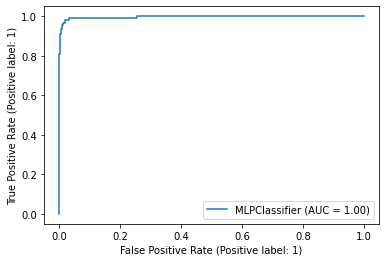

In [30]:
plot_roc_curve(clf_initial, list_values_test, label_test)

In [31]:
label_score.shape

NameError: name 'label_score' is not defined

In [32]:
label_score

NameError: name 'label_score' is not defined

In [33]:
clf_initial.score(list_values_train, label_train)
#0.9976852428006073

0.9976852428006073

In [34]:
############################################################################################
############################################################################################
# Permutation feature importance
#https://scikit-learn.org/stable/modules/permutation_importance.html

In [35]:
#r = permutation_importance(clf_initial, list_values_test, label_test,
#                           n_repeats=30,
#                            random_state=0)
#r

In [36]:
#r.importances_mean

In [37]:
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py
#sorted_idx = r.importances_mean.argsort()
#sorted_idx

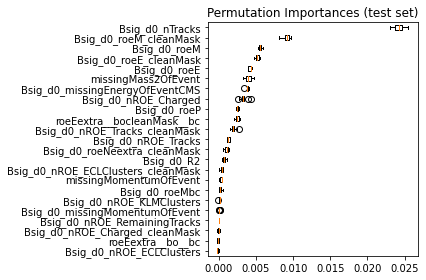

In [38]:
#df_list_values_test = pd.DataFrame(list_values_test, columns =ML_columns_tag)
#df_list_values_test

# feature of importance in test set

r_test = permutation_importance(
    clf_initial, list_values_test, label_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = r_test.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    r_test.importances[sorted_idx].T, vert=False, labels=sig_drop.columns[sorted_idx]
)

ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

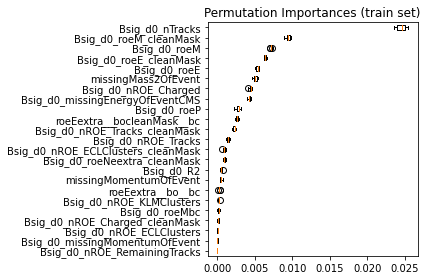

In [39]:

# feature of importance in train set
r_train = permutation_importance(
    clf_initial, list_values_train, label_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_idx2 = r_train.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    r_train.importances[sorted_idx2].T, vert=False, labels=sig_drop.columns[sorted_idx2]
)

ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

In [ ]:
C_range = [1e-2, 1e-1, 1, 3, 5, 10, 100,200, 300]  # used for MC13a
gamma_range = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2,1e-1,1]

classifiers = []
C_data=[]
gamma_data=[]
score_data=[]
for C in C_range:
    for gamma in gamma_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(list_values_train, label_train)
        score = clf.score(list_values_train, label_train)
        classifiers.append((C, gamma, score))
        C_data.append(C)
        gamma_data.append(gamma)
        score_data.append(score)

In [ ]:
print(gamma_data)

In [ ]:
df = pd.DataFrame(list(zip(C_data, gamma_data, score_data)),
               columns =['C', 'gamma', 'score'])

In [ ]:
df

In [ ]:
result = df.pivot(index='C', columns='gamma', values='score')
result

In [ ]:
# parameter optimization
sns.heatmap(result, annot=True)

In [ ]:
#svc_disp = RocCurveDisplay.from_estimator(classifier, Upsilon_list_test, label_test)
#plt.show()